In [1]:
# Load libraries
import seaborn
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import graphviz
import numpy as np
import sklearn
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
#Load Dataset from CSV file
dataset = pandas.read_csv("../unplugged.csv")
dataset.sample(frac=1)
dataset = dataset[0:360]
del dataset['Comments']

In [3]:
print(dataset.head(5))

  School Name Student Name  Age Gender Results_Before Results_After  Class  \
0   IMSJ G9-2       Anthny   12      M              F             F      4   
1   IMSJ G9-2  Farhana Ali   10      F              F             F      4   
2   IMSJ G9-2    Samiullah   10      M              F             F      4   
3   IMSJ G9-2        Uzair   12      M              F             F      4   
4   IMSJ G9-2        Sarim    8      M              P             P      4   

  Change Positive Outcomes  
0      F                 F  
1      F                 F  
2      F                 F  
3      F                 F  
4      T                 F  


In [4]:
print(dataset.shape)

(360, 9)


In [5]:
# Assign int values to string
gender = {'M': 1, 'F': 2}
dataset.Gender = [gender[item] for item in dataset.Gender]

after = {'F': 0, 'P': 1}
dataset.Results_After   = [after[item] for item in dataset.Results_After]

before = {'F': 0, 'P': 1}
dataset.Results_Before   = [before[item] for item in dataset.Results_Before]

print(dataset.describe())

dataset =  dataset[['Age', 'Gender', 'Class', 'Results_Before', 'Results_After', 'Positive Outcomes']]

              Age      Gender  Results_Before  Results_After       Class
count  360.000000  360.000000      360.000000     360.000000  360.000000
mean     9.616667    1.630556        0.391667       0.752778    4.052778
std      1.287502    0.483326        0.488802       0.431997    0.619995
min      7.000000    1.000000        0.000000       0.000000    3.000000
25%      9.000000    1.000000        0.000000       1.000000    4.000000
50%     10.000000    2.000000        0.000000       1.000000    4.000000
75%     10.000000    2.000000        1.000000       1.000000    4.000000
max     14.000000    2.000000        1.000000       1.000000    5.000000


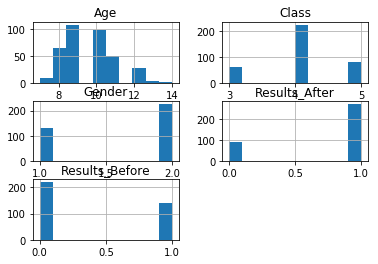

In [6]:
dataset.hist()
plt.show()

In [7]:
array = dataset.values
X = array[:,0:5]
Y = array[:,5:]
test_size = 0.2
seed = 7
#Split dataset into 80-20 ratio
#80% train data, 20% test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, 
random_state=seed, stratify = dataset['Positive Outcomes'])

In [8]:
# Test options and evaluation metric
num_folds = 5
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
models = []

models.append(('DT', DecisionTreeClassifier()))

# evaluate each model in turn
results = []
names = []

In [9]:
#Apply K-Fold for cross checking the Model accuracy
for name, model in models:
	kfold = sklearn.model_selection.KFold(n_splits=5,shuffle=False, random_state=None)
	cv_results = sklearn.model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

DT: 1.000000 (0.000000)


In [10]:
clf = DecisionTreeClassifier()
#Train our model
clf.fit(X_train, Y_train)
#Predict using our trained model
predictions = clf.predict(X_test)
#Find Accuracy
print(accuracy_score(Y_test, predictions))


1.0


In [11]:
cm = confusion_matrix(Y_test, predictions)
print (cm)

[[41  0]
 [ 0 31]]


AUC: 1.000


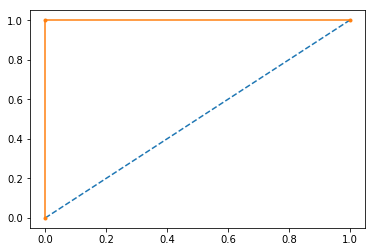

In [12]:
testy = []
probsy = []
probs = predictions[:]
for i in range(len(probs)):
    if (probs[i] == 'F'):
        probsy.append(0)
    else:
        probsy.append(1)
#     print(i)
for i in range(len(Y_test)):
    if (Y_test[i][0] == 'F'):
        testy.append(0)
    else:
        testy.append(1)
#     print (i)
# calculate AUC
auc = roc_auc_score(testy, probsy)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probsy)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


In [13]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           F       1.00      1.00      1.00        41
           T       1.00      1.00      1.00        31

   micro avg       1.00      1.00      1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



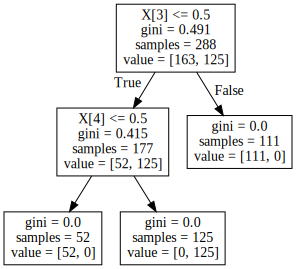

In [14]:
# Plot the Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None,
                     class_names=["0", "1"],
                     filled=True, rounded=True,
                     special_characters=True)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Randered_DT")
graph

# Random Dataset

In [15]:
#Load the random dataset
dataset = pandas.read_csv("../random_dataset.csv")
dataset.sample(frac=1)
# del dataset['Comments']

Age Gender Results_Before Results_After  Class Positive Outcomes
32     14      M              P             F      5                 F
1721   10      F              P             F      4                 F
1194   11      M              P             F      5                 F
3370   10      F              F             F      3                 F
761    13      F              F             F      3                 F
1387    9      F              P             F      5                 F
3124    9      F              F             P      3                 T
1262   10      F              F             F      5                 F
1145   11      F              F             P      4                 T
759     9      M              P             F      5                 F
181     9      F              F             F      5                 F
985    10      F              P             F      3                 F
3289   11      F              F             P      5                 T
2562   12      F              P             P      5                 F
898     8      M              P             P      4                 F
1778   10      F              F             P      4                 T
3388    9      F              F             P      5                 T
316     8      F              F             F      4                 F
1872    7      F              P             P      4                 F
418     7      F              P             P      3                 F
4617   14      M              F             P      4                 T
3757    8      F              P             P      3                 F
1546   12      F              P             P      5                 F
3723   10      M              F             F      3                 F
4221   13      M              F             P      4                 T
3225   10      M              P             P      5                 F
769     8      M              P             P      4                 F
4498    9      M              F             F      3                 F
4417   14      M              P             P      5                 F
2112    7      F              P             P      3                 F
...   ...    ...            ...           ...    ...               ...
2678   13      M              P             P      3                 F
2604   11      M              F             P      3                 T
3721    7      F              F             P      3                 T
4476    7      M              F             P      4                 T
3653   14      F              P             F      4                 F
1076    7      F              F             P      5                 T
2548   14      M              P             P      5                 F
1997   14      F              F             P      4                 T
468     8      F              F             P      4                 T
1572    8      M              P             P      3                 F
1091    8      F              F             F      3                 F
352    10      F              F             F      4                 F
907    13      M              P             F      3                 F
746    10      M              P             P      4                 F
3041   13      M              F             P      5                 T
2714   14      M              P             F      5                 F
1395    9      M              F             P      4                 T
3192   12      F              P             P      5                 F
2635   14      F              P             P      3                 F
1713   10      F              P             P      3                 F
1526   14      M              F             F      3                 F
802    14      F              F             F      4                 F
3657   14      M              P             P      5                 F
2491   10      M              F             F      5                 F
2088    8      F              

In [16]:
print(dataset.head(5))

   Age Gender Results_Before Results_After  Class Positive Outcomes
0   12      F              P             P      4                 F
1   11      M              F             P      5                 T
2   11      M              F             P      3                 T
3   14      F              P             P      4                 F
4   14      M              P             F      3                 F


In [17]:
# Assign int values to string   
gender = {'M': 1, 'F': 2}
dataset.Gender = [gender[item] for item in dataset.Gender]

after = {'F': 0, 'P': 1}
dataset.Results_After   = [after[item] for item in dataset.Results_After]

before = {'F': 0, 'P': 1}
dataset.Results_Before   = [before[item] for item in dataset.Results_Before]

print(dataset.describe())

dataset =  dataset[['Age', 'Gender', 'Class', 'Results_Before', 'Results_After', 'Positive Outcomes']]

               Age       Gender  Results_Before  Results_After        Class
count  5000.000000  5000.000000     5000.000000    5000.000000  5000.000000
mean     10.493400     1.492000        0.493600       0.495600     4.017800
std       2.280394     0.499986        0.500009       0.500031     0.817323
min       7.000000     1.000000        0.000000       0.000000     3.000000
25%       9.000000     1.000000        0.000000       0.000000     3.000000
50%      10.000000     1.000000        0.000000       0.000000     4.000000
75%      12.000000     2.000000        1.000000       1.000000     5.000000
max      14.000000     2.000000        1.000000       1.000000     5.000000


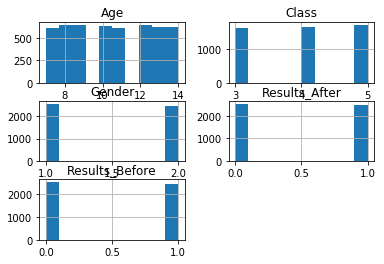

In [18]:
dataset.hist()
plt.show()

In [19]:
#Split dataset into train and test dataset
array = dataset.values
X = array[:,0:5]
Y = array[:,5:]
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, 
random_state=seed, stratify = dataset['Positive Outcomes'])

In [20]:
# Test options and evaluation metric
num_folds = 5
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
models = []

models.append(('DT', DecisionTreeClassifier()))

# evaluate each model in turn
results = []
names = []

In [21]:
#Apply K fold, cross checking the accuracy of our model
for name, model in models:
	kfold = sklearn.model_selection.KFold(n_splits=5,shuffle=False, random_state=None)
	cv_results = sklearn.model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

DT: 1.000000 (0.000000)


In [22]:
#Train the Model
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
# Make predictions using our trained Model
predictions = clf.predict(X_test)
#Find accuracy
print(accuracy_score(Y_test, predictions))

1.0


In [23]:
cm = confusion_matrix(Y_test, predictions)
print (cm)

[[751   0]
 [  0 249]]


AUC: 1.000


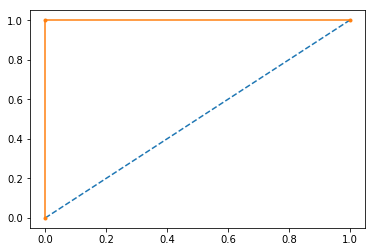

In [24]:
testy = []
probsy = []
probs = predictions[:]
for i in range(len(probs)):
    if (probs[i] == 'F'):
        probsy.append(0)
    else:
        probsy.append(1)
#     print(i)
for i in range(len(Y_test)):
    if (Y_test[i][0] == 'F'):
        testy.append(0)
    else:
        testy.append(1)
#     print (i)
# calculate AUC
auc = roc_auc_score(testy, probsy)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probsy)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


In [25]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           F       1.00      1.00      1.00       751
           T       1.00      1.00      1.00       249

   micro avg       1.00      1.00      1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



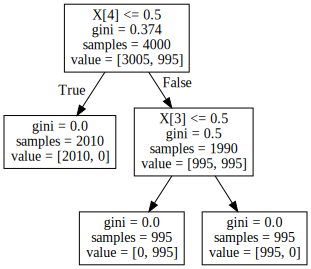

In [26]:
#Plot Descision Tree
dot_data = tree.export_graphviz(clf, out_file=None,
                     class_names=["0", "1"],
                     filled=True, rounded=True,
                     special_characters=True)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("RanderedDT_Before")
graph